In [50]:
import numpy as np
import pandas as pd
data=pd.read_csv('NIFTY_6month.csv')
data.head()


,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,10-JUN-2024,23319.15,23411.90,23227.15,23259.20,304392368.0,29060.40
1,11-JUN-2024,23283.75,23389.45,23206.65,23264.85,305185666.0,29190.91
2,12-JUN-2024,23344.45,23441.95,23295.95,23322.95,295630910.0,31795.48
3,13-JUN-2024,23480.95,23481.05,23353.90,23398.90,268279841.0,30151.67
4,14-JUN-2024,23464.95,23490.40,23334.25,23465.60,223086741.0,25746.34


In [44]:
data.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
120,03-DEC-2024,24367.50,24481.35,24280.00,24457.15,339470947.0,34228.30
121,04-DEC-2024,24488.75,24573.20,24366.30,24467.45,348003156.0,34639.78
122,05-DEC-2024,24539.15,24857.75,24295.55,24708.40,361469920.0,40471.33
123,06-DEC-2024,24729.45,24751.05,24620.50,24677.80,226731303.0,23904.13
124,09-DEC-2024,24633.90,24705.00,24580.05,24619.00,248139308.0,25099.79


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             125 non-null    object 
 1   Open             125 non-null    float64
 2   High             125 non-null    float64
 3   Low              125 non-null    float64
 4   Close            125 non-null    float64
 5   Shares Traded    124 non-null    float64
 6   Turnover (₹ Cr)  124 non-null    float64
dtypes: float64(6), object(1)
memory usage: 7.0+ KB


In [46]:
data['Date '] = pd.to_datetime(data['Date '])
data.set_index('Date ', inplace=True)

# Check for missing values and handle them if any
data = data.dropna(inplace=True)

C:\Users\Prerana Walvekar\AppData\Local\Temp\ipykernel_1968\4043175109.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date '] = pd.to_datetime(data['Date '])


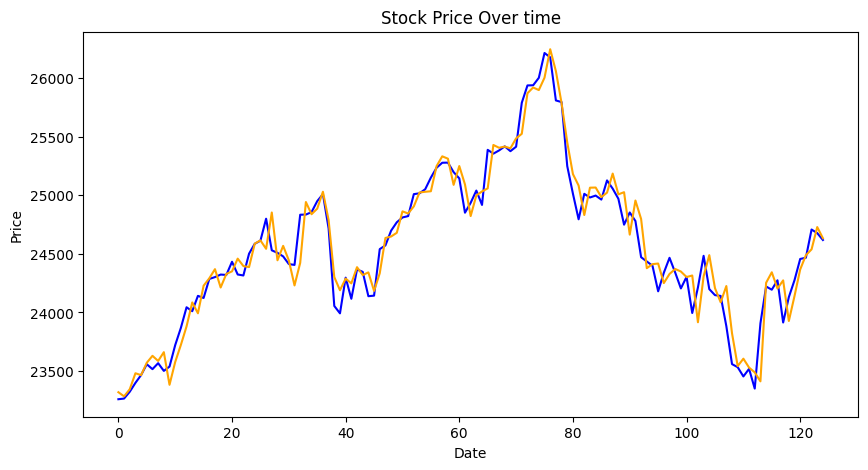

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(data['Close '],label='Close Price',color='blue')
plt.plot(data['Open '],label='Open Price',color='orange')
plt.title('Stock Price Over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

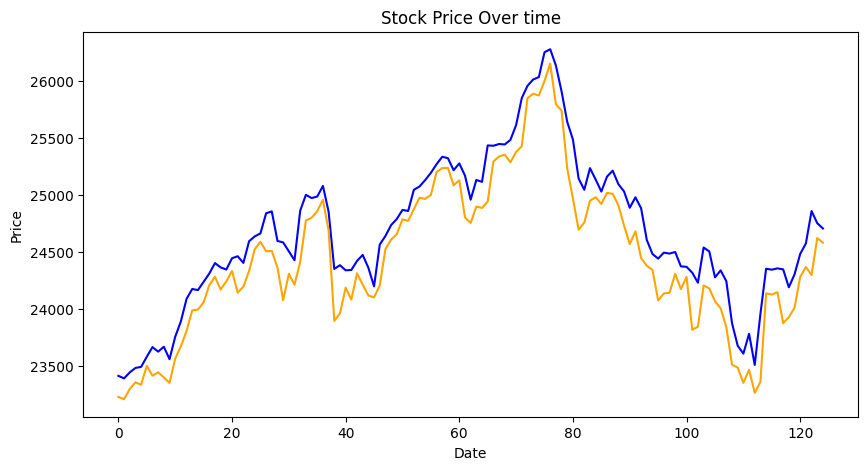

In [52]:
plt.figure(figsize=(10,5))
plt.plot(data['High '],label='Close Price',color='blue')
plt.plot(data['Low '],label='Close Price',color='orange')
plt.title('Stock Price Over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#Check stationary

In [53]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(data['Close '])
print("ADF Statics : ",result[0])
print("p-value : ",result[1])
if(result[1]<=0.05):
    print("The data is stationary.")
else:
     print("The data is not stationary. Differencing might be required.")

ADF Statics :  -2.2248576029560834
p-value :  0.19734758288225512
The data is not stationary. Differencing might be required.


In [54]:
#differencing
data['Close_diff']=data['Close '].diff().dropna()
#Check data is stationary
result=adfuller(data['Close_diff'].dropna())
print("ADF Statics : ",result[0])
print("p-value : ",result[1])
if(result[1]<=0.05):
    print("The data is stationary.")
else:
     print("The data is not stationary. Differencing might be required.")


ADF Statics :  -10.264571017619017
p-value :  4.1515226350372456e-18
The data is stationary.


#Autocorrelation and Partial Autocorrelation

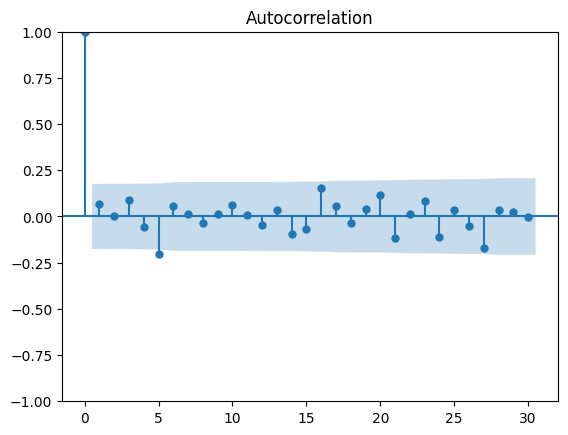

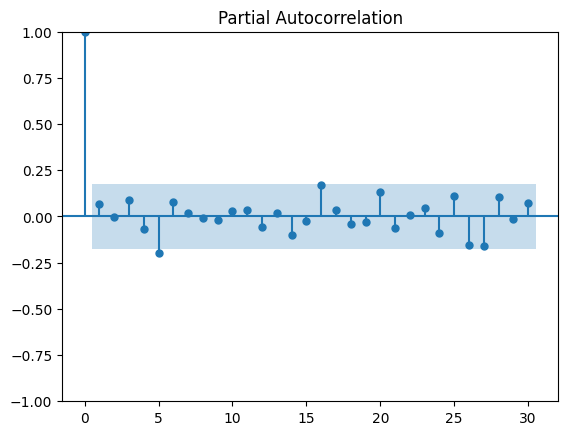

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data["Close_diff"].dropna(),lags=30)
plot_pacf(data["Close_diff"].dropna(),lags=30)
plt.show()

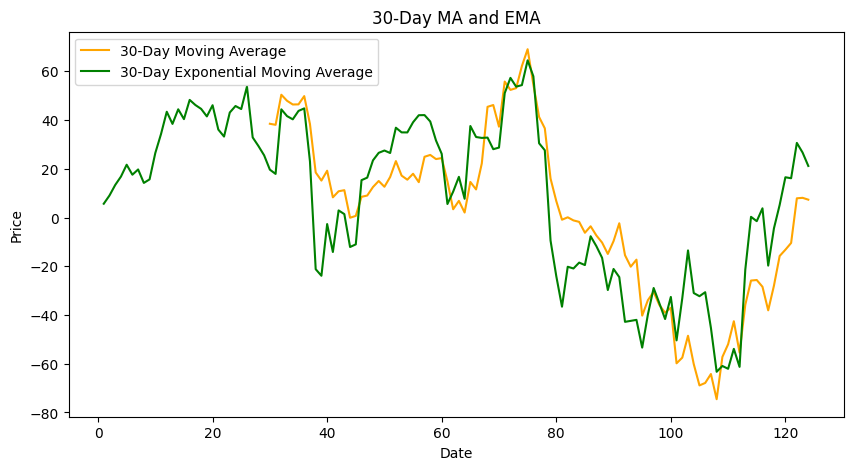

In [56]:
# Calculate 30-day Moving Average and Exponential Moving Average
data['30_day_MA'] = data['Close_diff'].rolling(window=30).mean()
data['30_day_EMA'] = data['Close_diff'].ewm(span=30, adjust=False).mean()

# Plotting the Moving Averages
plt.figure(figsize=(10, 5))
plt.plot(data['30_day_MA'], label='30-Day Moving Average', color='orange')
plt.plot(data['30_day_EMA'], label='30-Day Exponential Moving Average', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('30-Day MA and EMA')
plt.legend()
plt.show()



In [57]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['Close '],order=(26,2,0))
arima_result=model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Close    No. Observations:                  125
Model:                ARIMA(26, 2, 0)   Log Likelihood                -810.265
Date:                Fri, 13 Dec 2024   AIC                           1674.529
Time:                        16:25:55   BIC                           1750.458
Sample:                             0   HQIC                          1705.372
                                - 125                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7996      0.089     -9.031      0.000      -0.973      -0.626
ar.L2         -0.6929      0.126     -5.499      0.000      -0.940      -0.446
ar.L3         -0.6154      0.152     -4.040      0.000      -0.914      -0.317
ar.L4         -0.6303      0.164     -3.836      0.000      -0.952      -0.308
ar.L5         -0.7803      0.176     -4.428      0.000      -1.126      -0.435
ar.L6         -0.6404      0.220     -2.914      0.004      -1.071      -0.210
ar.L7         -0.5669      0.219     -2.587      0.010      -0.997      -0.137
ar.L8         -0.5601      0.249     -2.246      0.025      -1.049      -0.071
ar.L9         -0.5911      0.249     -2.374      0.018      -1.079      -0.103
ar.L10        -0.4958      0.286     -1.733      0.083      -1.057       0.065
ar.L11        -0.2732      0.289     -0.945      0.345      -0.840       0.293
ar.L12        -0.2622      0.279     -0.940      0.347      -0.809       0.285
ar.L13        -0.2802      0.279     -1.006      0.315      -0.826       0.266
ar.L14        -0.3722      0.278     -1.338      0.181      -0.918       0.173
ar.L15        -0.2997      0.301     -0.996      0.319      -0.890       0.290
ar.L16        -0.0339      0.314     -0.108      0.914      -0.649       0.581
ar.L17        -0.0153      0.304     -0.050      0.960      -0.611       0.580
ar.L18        -0.0094      0.284     -0.033      0.973      -0.565       0.546
ar.L19        -0.0394      0.238     -0.165      0.869      -0.506       0.427
ar.L20         0.1776      0.225      0.788      0.431      -0.264       0.619
ar.L21         0.1237      0.203      0.611      0.542      -0.274       0.521
ar.L22         0.0718      0.185      0.388      0.698      -0.291       0.435
ar.L23         0.1708      0.185      0.923      0.356      -0.192       0.533
ar.L24         0.1373      0.152      0.906      0.365      -0.160       0.434
ar.L25         0.2986      0.121      2.477      0.013       0.062       0.535
ar.L26         0.1933      0.088      2.194      0.028       0.021       0.366
sigma2      2.558e+04   3574.685      7.155      0.000    1.86e+04    3.26e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.80
Prob(Q):                              0.95   Prob(JB):                         0.25
Heteroskedasticity (H):               1.18   Skew:                             0.09
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

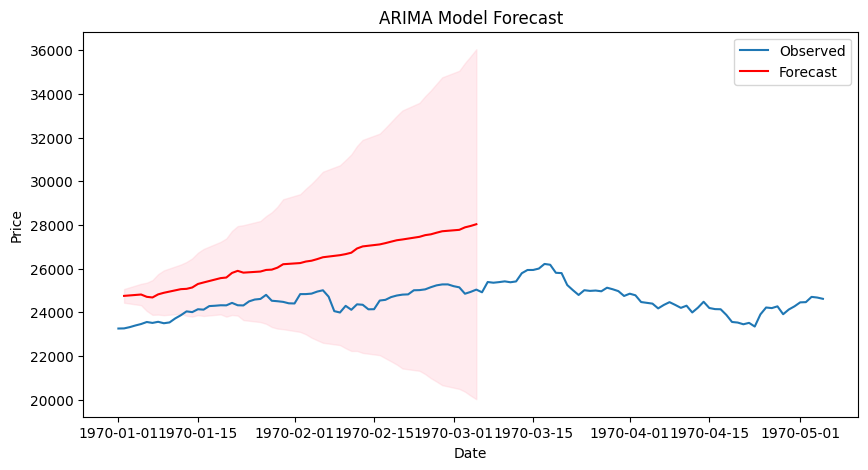

In [65]:
forecast=arima_result.get_forecast(steps=45)
forecast_index = pd.date_range(start=pd.Timestamp(data.index[-1]) + pd.Timedelta(days=1), periods=45, freq='B')
# Extract forecasted values
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
plt.figure(figsize=(10, 5))
plt.plot(data['Close '], label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [61]:
import numpy as np

# Calculate RMSE manually
train_predictions = arima_result.fittedvalues
rmse = np.sqrt(((train_predictions - data['Close ']) ** 2).mean())
print("RMSE:", rmse)



RMSE: 2096.9165515038185


In [32]:
# Save the forecast to a CSV file
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecast': forecast_mean,
    'Lower_CI': forecast_ci.iloc[:, 0],
    'Upper_CI': forecast_ci.iloc[:, 1]
})
forecast_df.to_csv('forecasted_data.csv', index=False)
df=pd.read_csv('forecasted_data.csv')
df



,Date,Forecast,Lower_CI,Upper_CI
0,1970-01-01 00:00:00.000000124,24753.809616,24440.363112,25067.256121
1,1970-01-02 00:00:00.000000124,24816.738778,24327.030050,25306.447505
2,1970-01-05 00:00:00.000000124,24710.250458,24063.603931,25356.896986
3,1970-01-06 00:00:00.000000124,24681.381868,23886.360478,25476.403258
4,1970-01-07 00:00:00.000000124,24823.213767,23896.749397,25749.678138
5,1970-01-08 00:00:00.000000124,24895.341465,23870.461881,25920.221048
6,1970-01-09 00:00:00.000000124,25062.099575,23935.017852,26189.181298
7,1970-01-12 00:00:00.000000124,25075.705066,23844.119896,26307.290237
8,1970-01-13 00:00:00.000000124,25138.382524,23805.627317,26471.137730
9,1970-01-14 00:00:00.000000124,25299.296188,23870.303655,26728.288722
